In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
import os
import warnings
warnings.filterwarnings('ignore')

#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
pd.pandas.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# size of dataset
# as 81 features so we can try different feature selection and feature engineering methods

train.shape

(1460, 81)

In [4]:
# display info about the dataset

train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# sneak peek

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Taking a look at SalePrice

In [6]:
# let's take look at stats for SalePrice

train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

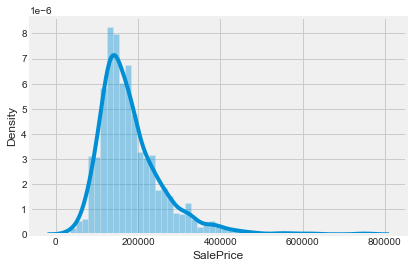

In [7]:
_ = sns.distplot(train.SalePrice)

In [8]:
#skewness and kurtosis

print(f"Skewness: {train['SalePrice'].skew()}")
print(f"Kurtosis: {train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


# Relationship between selected features

# Relation with numerical variables

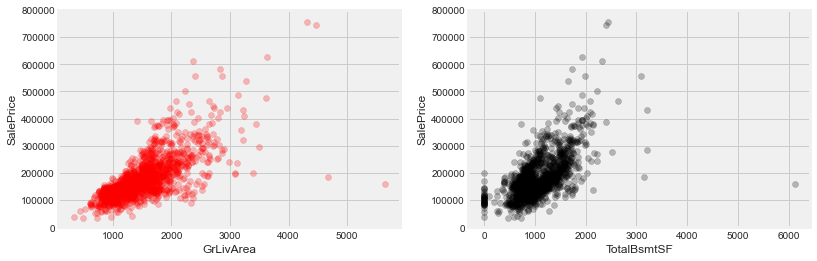

In [9]:
#scatter plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(train['GrLivArea'], train['SalePrice'], c='red', alpha=0.25)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.ylim(0,800000)

plt.subplot(1, 2, 2)
plt.scatter(train['TotalBsmtSF'], train['SalePrice'], c='k', alpha=0.25)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.ylim(0,800000)
plt.show()

# Relation with categorical variables

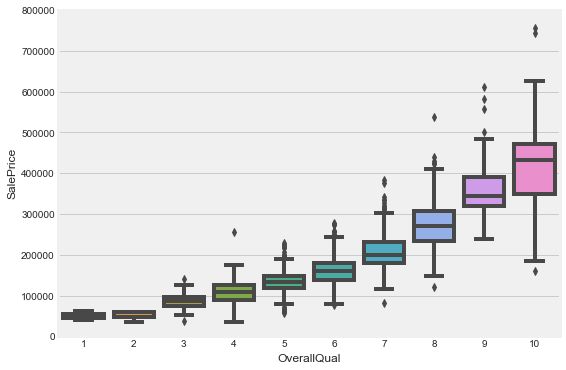

In [10]:
plt.figure(figsize=(8, 6))
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
_ = sns.boxplot(x=var, y="SalePrice", data=data)
plt.axis(ymin=0, ymax=800000)
plt.show()

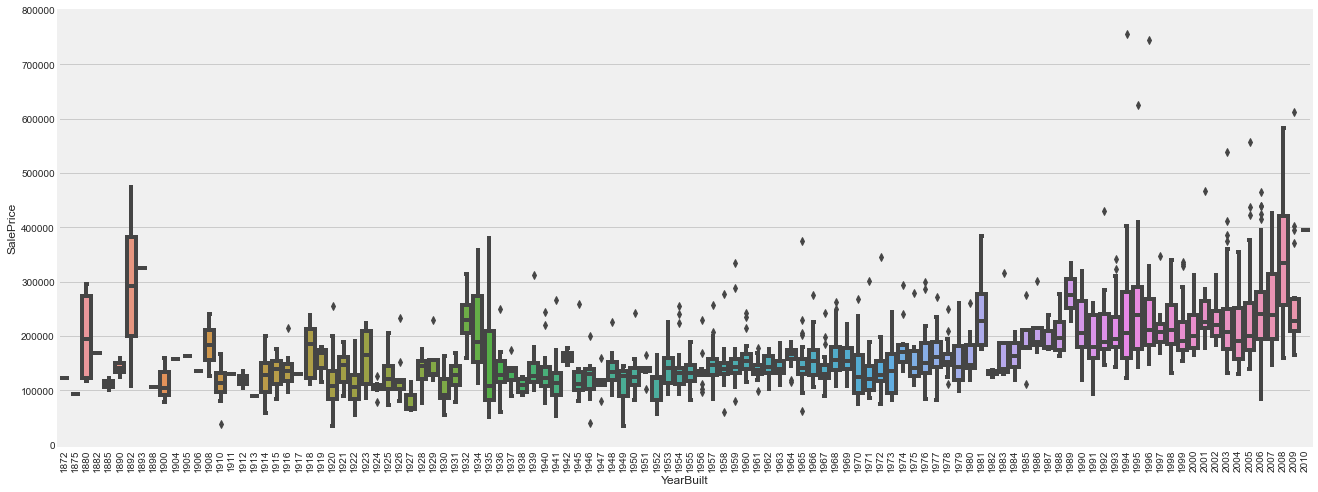

In [11]:
plt.figure(figsize=(20, 8))
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
_ = plt.xticks(rotation=90)

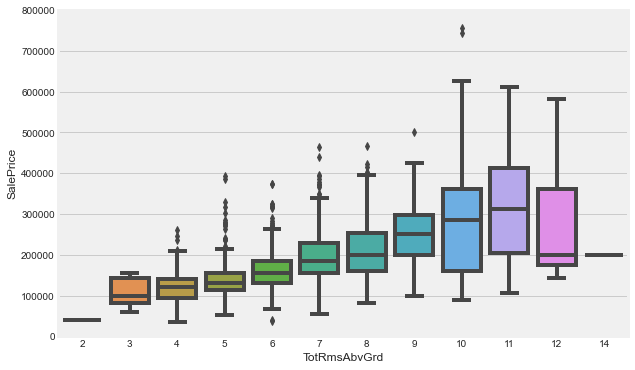

In [12]:
plt.figure(figsize=(20, 6))
var = 'TotRmsAbvGrd'
plt.subplot(1, 2, 1)
data = pd.concat([train['SalePrice'], train[var]], axis=1)
_ = sns.boxplot(x=var, y="SalePrice", data=data)
plt.axis(ymin=0, ymax=800000)
plt.show()

# Analysis of other variables

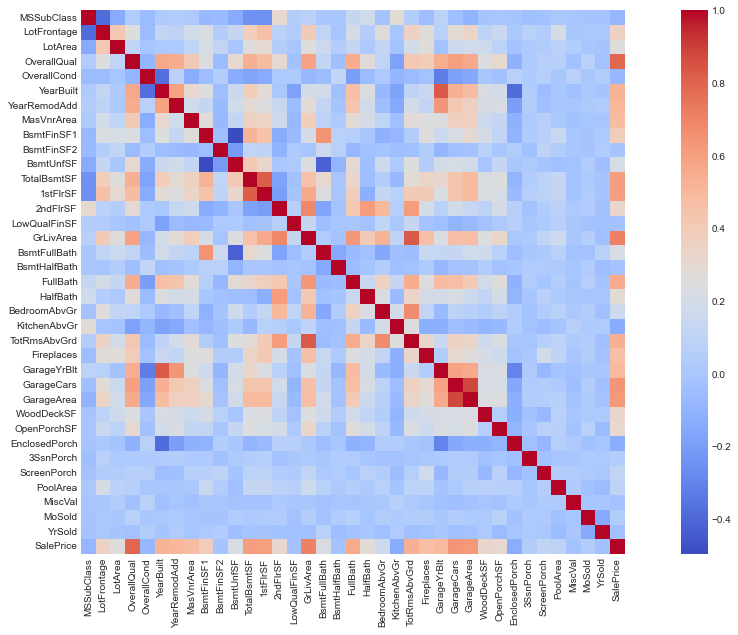

In [13]:
plt.figure(figsize=(18, 10))
corrmat = train.drop('Id', 1).corr()
_ = sns.heatmap(corrmat, vmax=1.0, square=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'size': 8})
plt.show()

In [14]:
numerical_features = train.select_dtypes('number').columns.to_list()
numerical_features.pop(0)
print(f"Number of numerical features: {len(numerical_features)}")

# although numerical there are features which reprsent years
# there are some dicrete numerical features too.
# we need to remove them from the list.


year_features = [feature for feature in numerical_features 
                 if 'Yr' in feature or 'Year' in feature]
print(f"Number of Temporal features: {len(year_features)}")


discrete_features = [feature for feature in numerical_features 
                     if train[feature].nunique()<= 15 and feature not in year_features]
print(f"Number of discrete numerical features: {len(discrete_features)}")

continuous_num_features = [feature for feature in numerical_features 
                     if feature not in discrete_features + year_features] 
                                               
print(f"Number of continuous numerical features: {len(continuous_num_features)}")

Number of numerical features: 37
Number of Temporal features: 4
Number of discrete numerical features: 14
Number of continuous numerical features: 19


<Figure size 720x576 with 0 Axes>

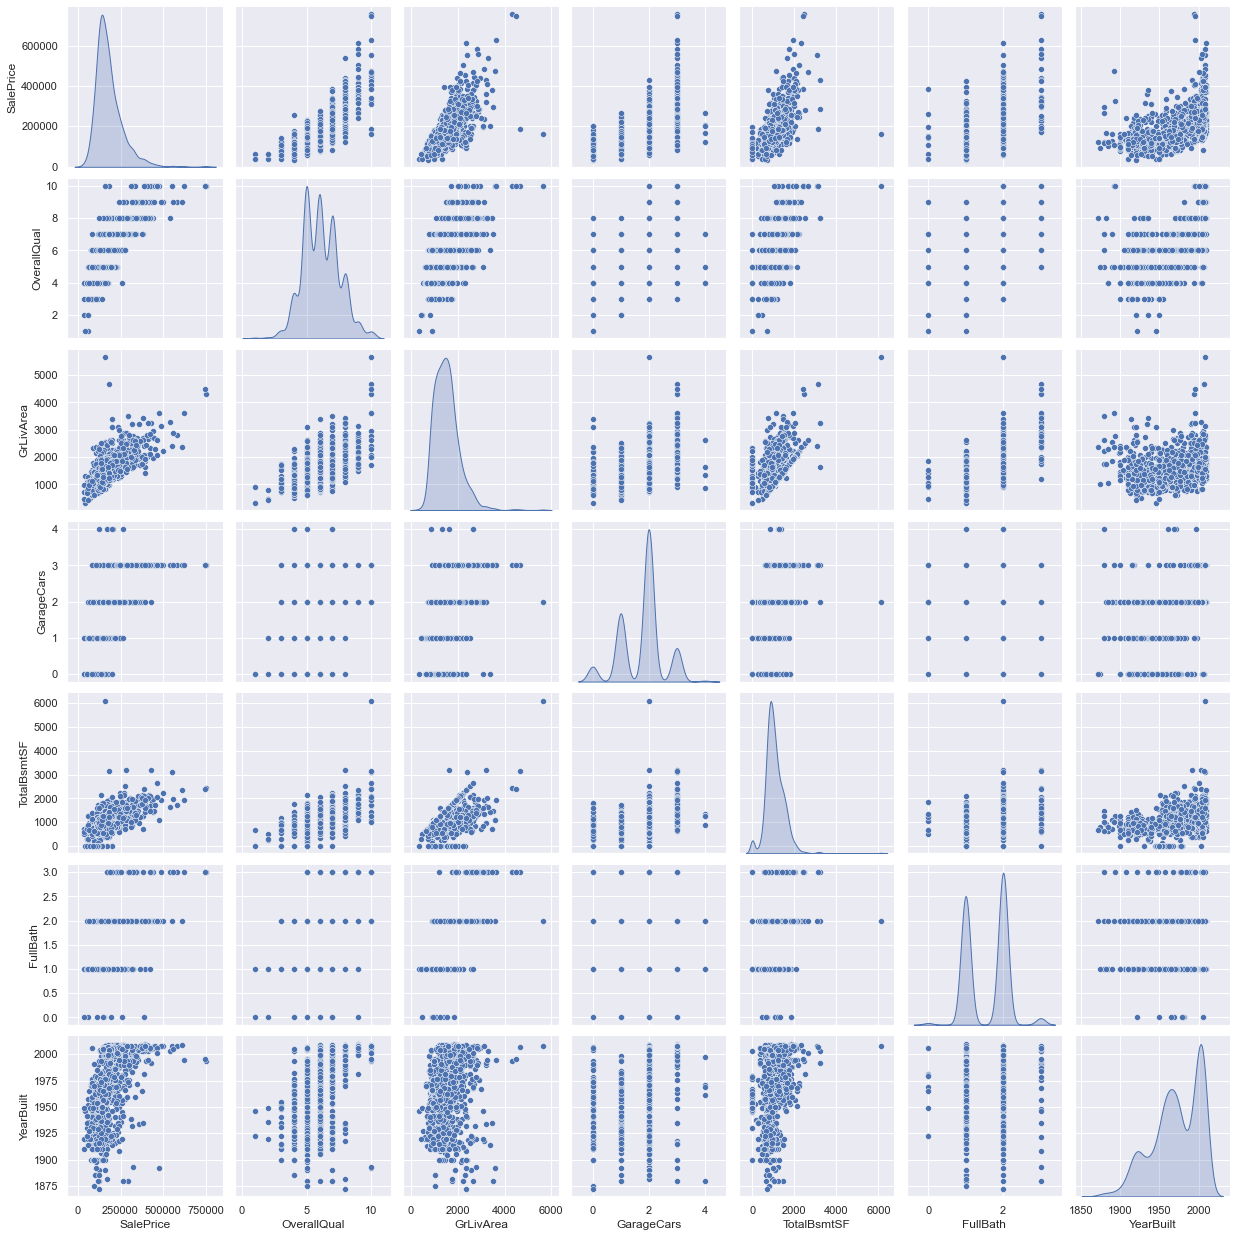

In [16]:
# SalePrice scatter plot with highly correlated features
plt.figure(figsize=(10, 8))

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
_ = sns.pairplot(train[cols], size = 2.5, diag_kind='kde')
plt.show()

# Missing data

In [17]:
features_with_na = [features for features in train.columns if train[features].isnull().sum() >= 1]

a = pd.DataFrame({
    'features': features_with_na,
    'Total': [train[i].isnull().sum() for i in features_with_na],
    'Missing_PCT': [np.round(train[i].isnull().sum()/ train.shape[0], 4) for i in features_with_na]
}).sort_values(by='Missing_PCT', ascending=False).reset_index(drop=True)
a.style.background_gradient(cmap='Reds') 

,features,Total,Missing_PCT
0,PoolQC,1453,0.995200
1,MiscFeature,1406,0.963000
2,Alley,1369,0.937700
3,Fence,1179,0.807500
4,FireplaceQu,690,0.472600
5,LotFrontage,259,0.177400
6,GarageType,81,0.055500
7,GarageYrBlt,81,0.055500
8,GarageFinish,81,0.055500
9,GarageQual,81,0.055500


# Examining Missing Features

In [18]:
train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [19]:
train[train['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


In [20]:
#Unique elements
train['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [21]:
train[train['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [22]:
# Let's look at the repeated value in MasVnrType column

train['MasVnrType'].mode()

0    None
Name: MasVnrType, dtype: object

In [23]:
train[train['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1',
                        'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].head(15)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [24]:
train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2']].mode()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,TA,TA,No,Unf,Unf


In [25]:
train[train['GarageType'].isnull()][['GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


# Considering effect of Outliers

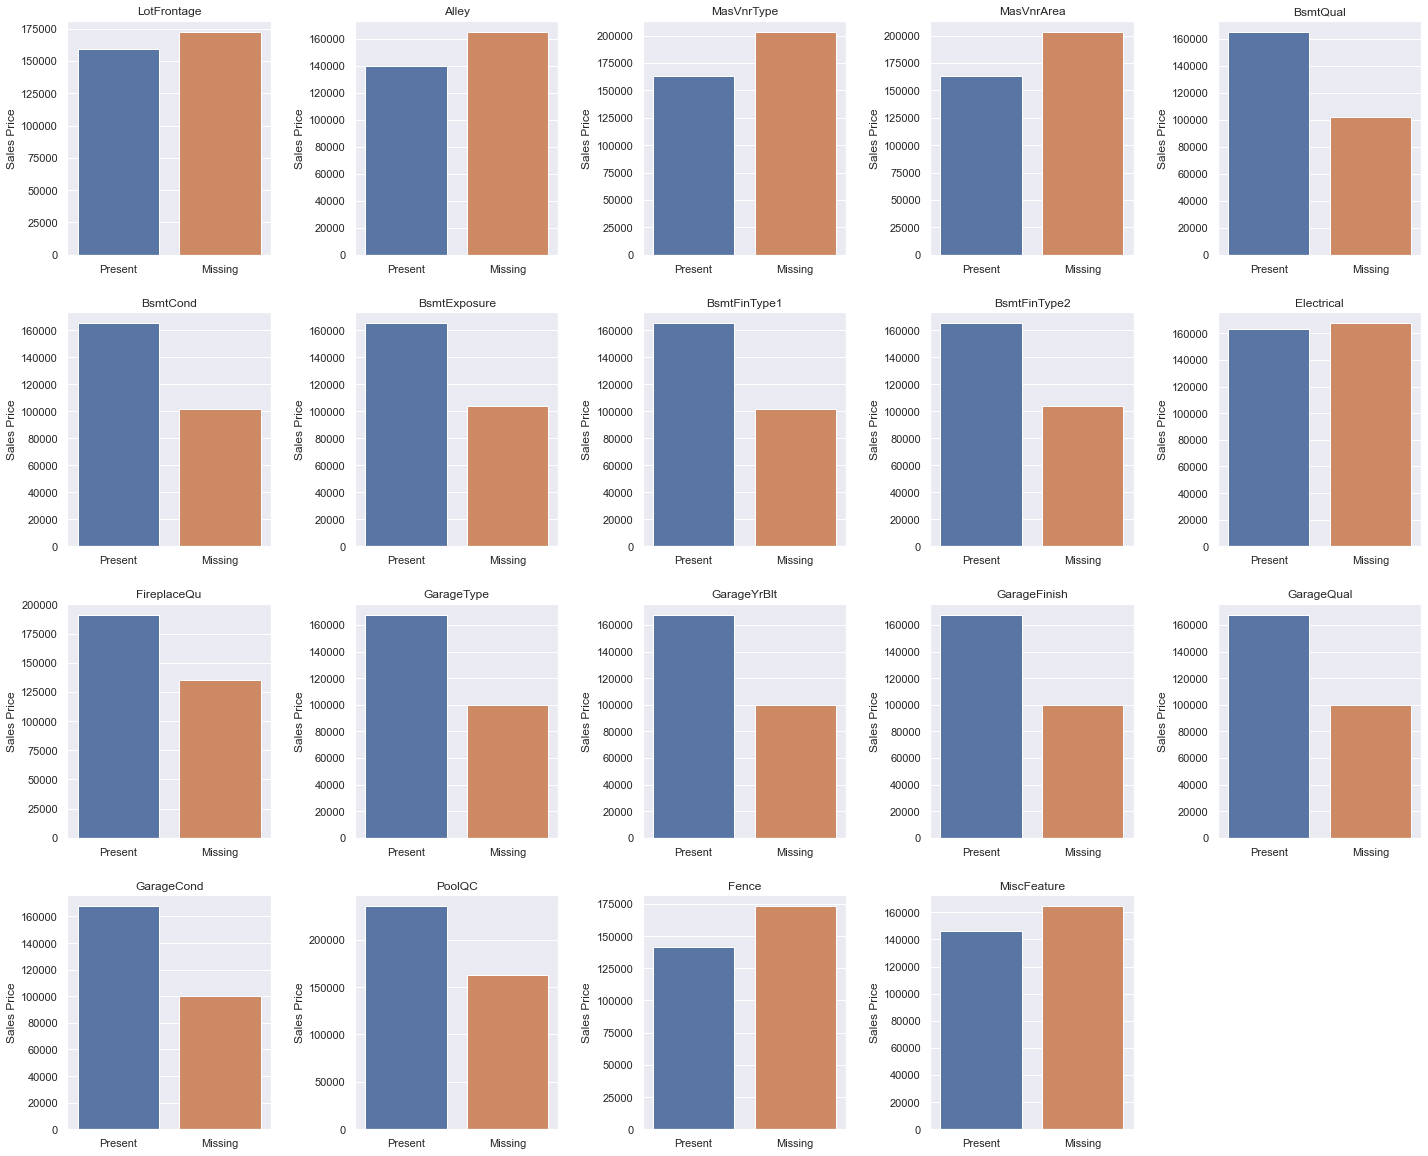

In [26]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features_with_na, 1):
    plt.subplot(5, 5, i)
    data = train.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # calculate the median SalePrice where the information is missing or present
    temp = data.groupby(feature)['SalePrice'].median()
    _ = sns.barplot(x=temp.index, y=temp.values)
    plt.title(feature)
    plt.xlabel("")
    plt.xticks([0, 1], ["Present", "Missing"])
    plt.ylabel("Sales Price", rotation=90)
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

# Univariate analysis

In [27]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


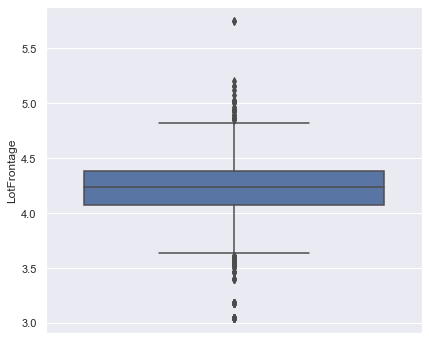

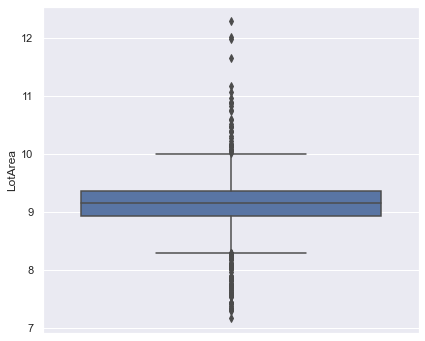

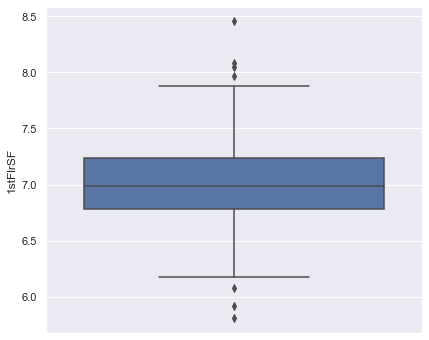

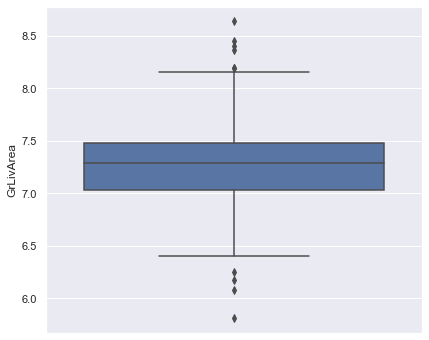

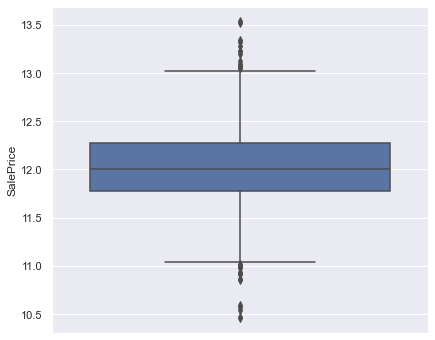

In [28]:
data = train.copy()
# sale_price = np.log(train['SalePrice'])

for i, feature in enumerate(continuous_num_features, 1):
    data = train[feature].copy()
    if 0 in data.unique(): # as log 0 is undefinedz
        continue
    else:
        data = np.log(data)   
        data.name = feature
        _ = plt.figure(figsize=(6, 6))
        _ = sns.boxplot(y=data)
    
plt.show()

# Bivariate analysis

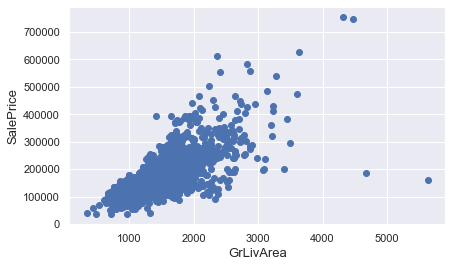

In [29]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# Normality

In [30]:
train.select_dtypes('number').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


 mu = 180921.20 and sigma = 79415.29



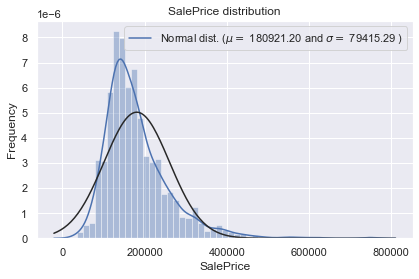

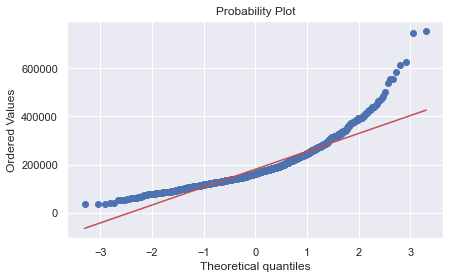

In [31]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend([f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f} )'],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

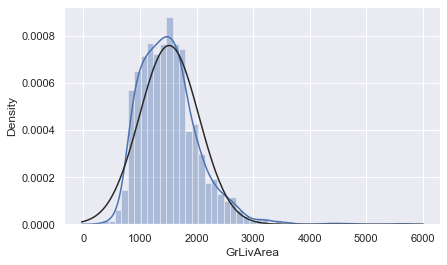

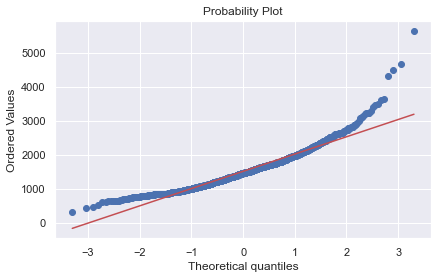

In [32]:
# GrLivArea
# histogram and normal probability plot

sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

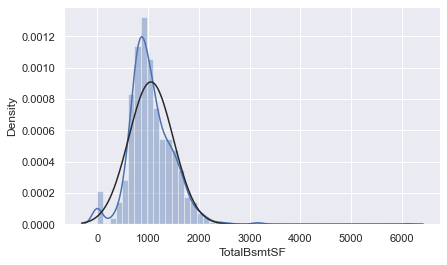

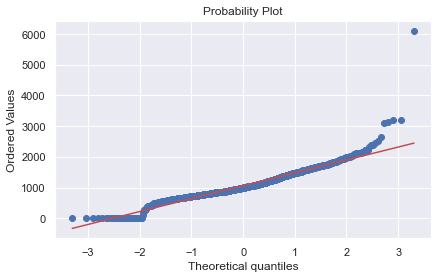

In [33]:
# TotalBsmtSF
# histogram and normal probability plot

sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

# Skewed Features

In [34]:
print("\nSkew in numerical features: \n")
pd.DataFrame({
    'Feature': numerical_features,
    'Skewness': skew(train[numerical_features])}).sort_values(by='Skewness',
                                                              ascending=False).set_index('Feature').head(10)


Skew in numerical features: 



,Skewness
Feature,
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186


In [35]:
train[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


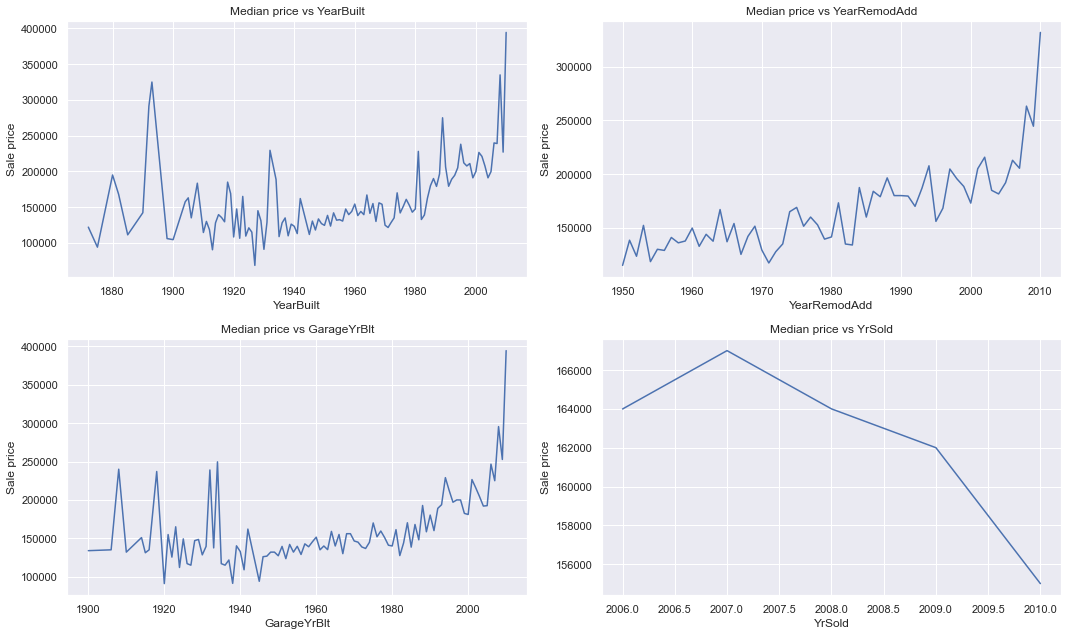

In [36]:
plt.figure(figsize=(15, 9))
for i, feature in enumerate(year_features, 1):
    plt.subplot(2, 2, i)
    temp = train.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    # plt.xlim([2006, 2010])
    # plt.xticks(range(2006, 2011))
    plt.title(f"Median price vs {feature}")
    plt.ylabel("Sale price", rotation=90)
plt.tight_layout(w_pad=1.2, h_pad=1.2)
plt.show()

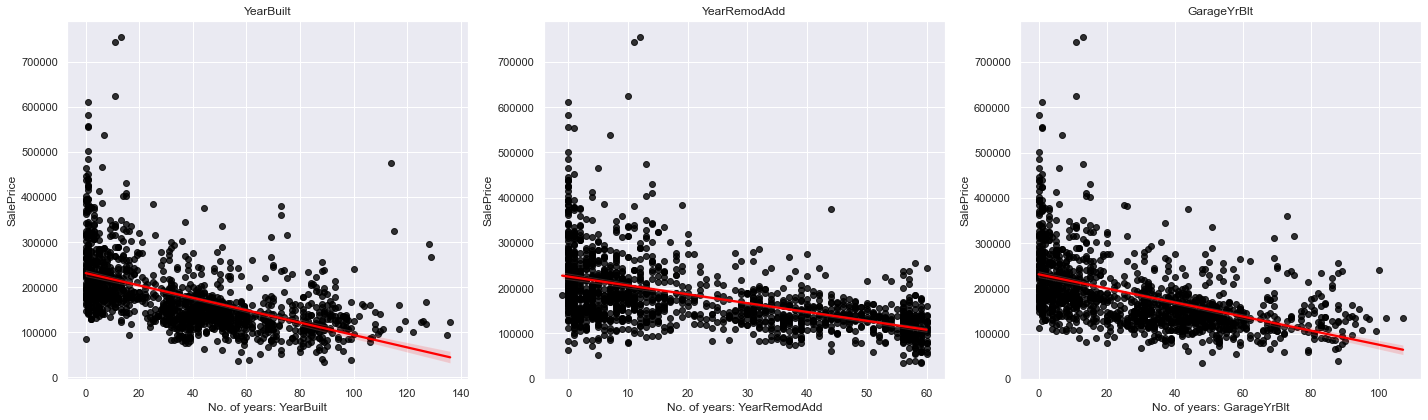

In [37]:
plt.figure(figsize=(20, 6))

for i, feature in enumerate(year_features, 1):
    
    if feature != 'YrSold':
        data = train.copy()
        
        data[feature] = data['YrSold'] - data[feature]
        plt.subplot(1, 3, i)
#         plt.scatter()
        plt.title(feature)
        
        plt.ylabel('SalePrice')
        sns.regplot(data[feature], data['SalePrice'], 
                   scatter_kws={"color": "black"}, line_kws={"color": "red"})
        plt.xlabel(f"No. of years: {feature}")
plt.tight_layout()
plt.show()        

# Types of numerical variables

# Discrete numerical values

In [38]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

In [39]:
train[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


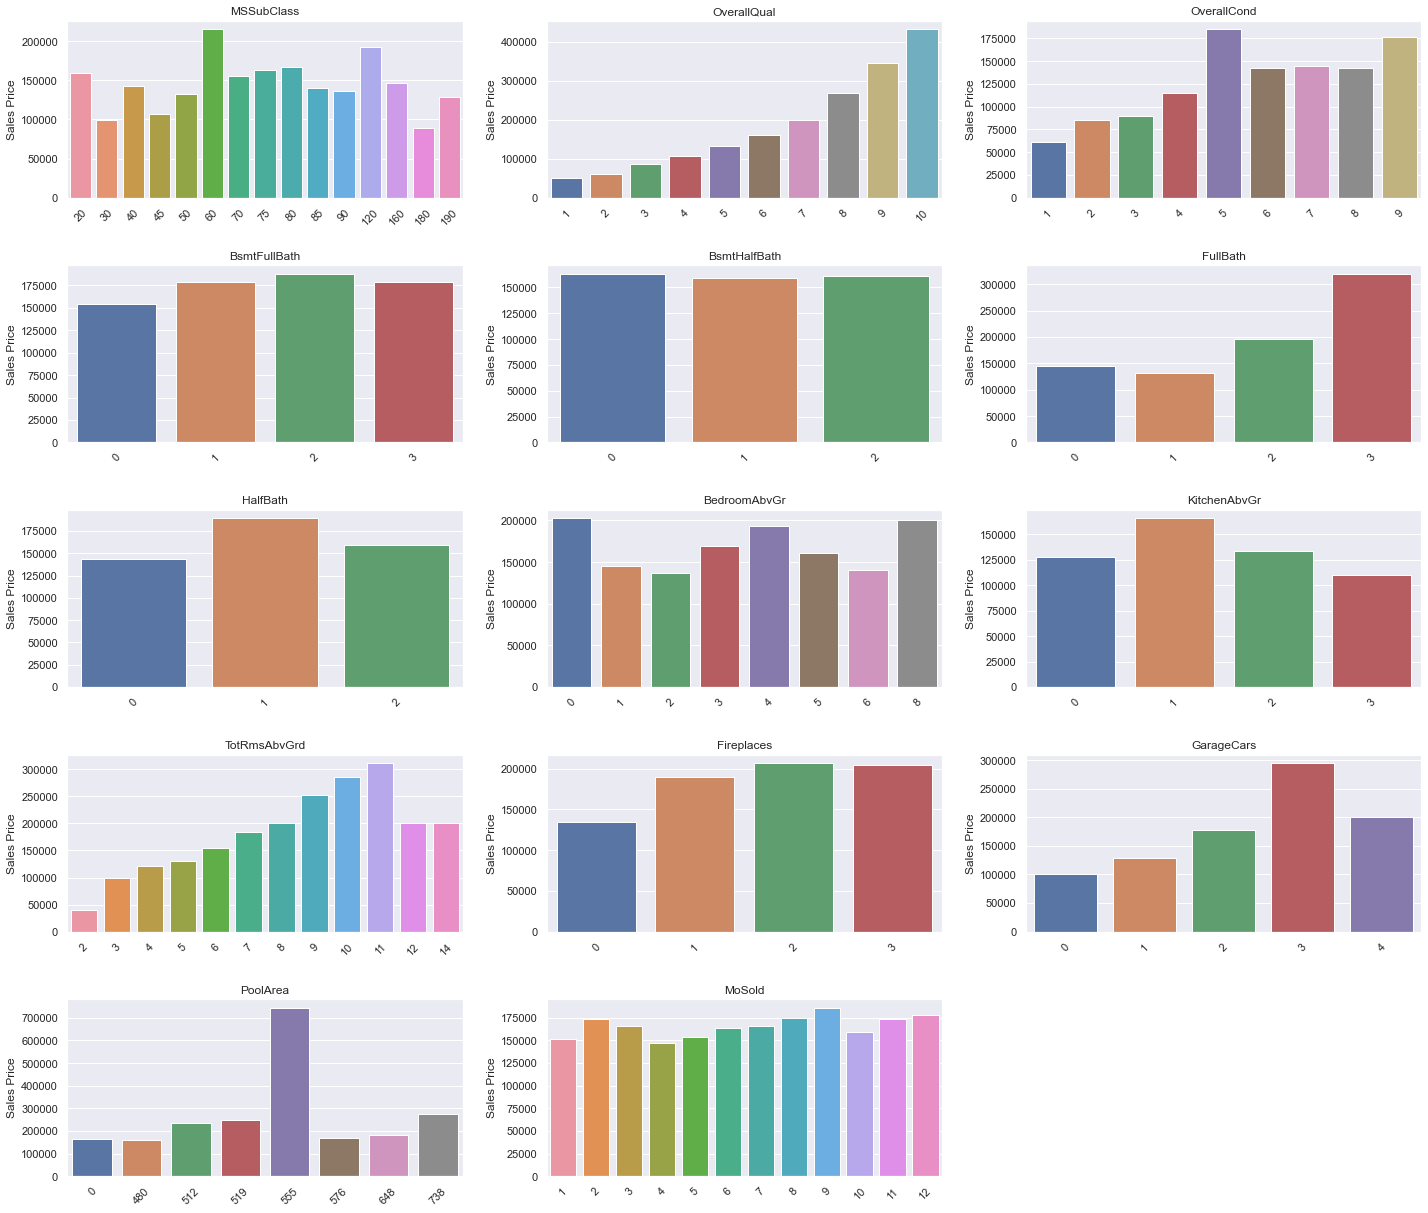

In [40]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(discrete_features, 1):
    plt.subplot(6, 3, i)
    data = train.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    
    # calculate the median SalePrice where the information is missing or present
    temp = data.groupby(feature)['SalePrice'].median()
    _ = sns.barplot(x=temp.index, y=temp.values)
    plt.title(feature)
    plt.xlabel("")
    plt.ylabel("Sales Price", rotation=90)
    plt.xticks(rotation=45)
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

# Continuous numerical values

In [41]:
print(f"Number of Continuous numerical feature: {len(continuous_num_features)}")

Number of Continuous numerical feature: 19


In [42]:
continuous_num_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [43]:
train[continuous_num_features].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


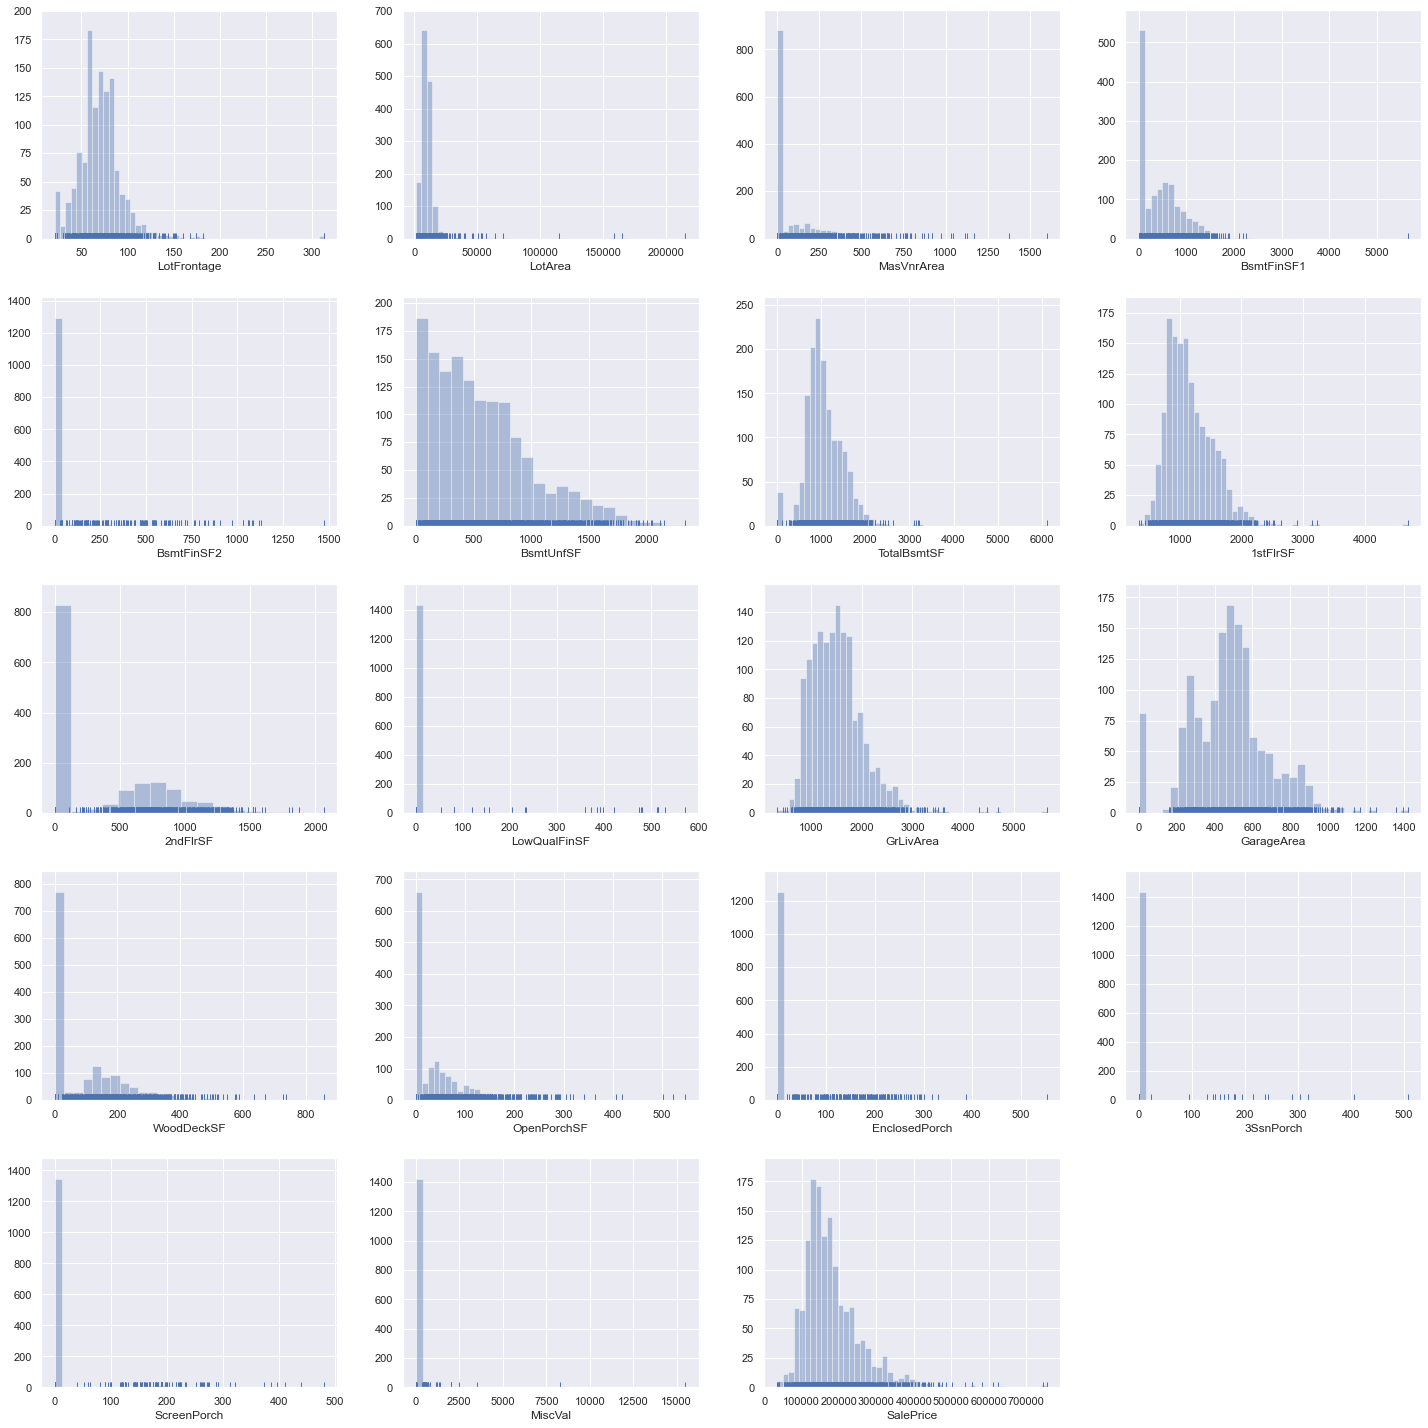

In [44]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(continuous_num_features, 1):
    plt.subplot(5, 4, i)
#     _ = sns.distplot(train[feature], kde_kws={'bw': 1.05})    
    _ = sns.distplot(train[feature], kde=False, rug=True)
    
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()